<a href="https://colab.research.google.com/github/Tahsin-Azad-Tias/Thesis/blob/main/model/DL_RNN_RFECV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id "1M9TX_sIGURVyGory7oHh5oO_gfjoWnx3"
!gdown --id "1-pUUsukgZizH-dJobClAlXeHwSyiR2cB"

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1M9TX_sIGURVyGory7oHh5oO_gfjoWnx3
To: /content/train_data_rfecv.csv
100% 48.1M/48.1M [00:02<00:00, 22.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-pUUsukgZizH-dJobClAlXeHwSyiR2cB
To: /content/test_data_rfecv.csv
100% 17.3M/17.3M [00:00<00:00, 19.9MB/s]


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from keras.models import Sequential, Model
from keras.layers import LSTM, SimpleRNN, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
train_df = pd.read_csv("/content/train_data_rfecv.csv")
test_df = pd.read_csv("/content/test_data_rfecv.csv")

In [ ]:
X_train = train_df.drop(['label1','label2'], axis =1)
y_freq_train = train_df['label1'].astype(int)
y_fault_train = train_df['label2'].astype(int)

In [ ]:
X_test = test_df.drop(['label1','label2'], axis =1)
y_freq_test = test_df['label1'].astype(int)
y_fault_test = test_df['label2'].astype(int)

In [ ]:
X_train

,0,1,2,4,5,6,8,9,10,12,...,214,215,216,217,218,219,220,221,222,223
0,42.131684,40.198692,23.295811,42.437660,40.618163,22.516047,42.773624,41.110187,22.901312,42.769196,...,40.405141,43.042069,36.369730,28.364376,39.615743,42.373942,35.977329,31.385686,38.843000,41.610540
1,41.149020,42.743316,19.823443,41.422845,43.053617,18.102406,41.683776,43.430899,16.896830,41.679114,...,37.191340,42.664985,36.213186,36.653671,36.377874,41.825076,35.951959,36.538728,35.797628,40.791213
2,41.854588,34.129095,31.378763,42.062527,35.059588,33.303153,42.254823,36.022832,34.698240,42.096596,...,25.697635,40.603158,44.246206,30.550164,29.007724,40.057353,44.083880,29.945770,30.997983,39.505920
3,43.472609,42.817066,20.935997,43.785358,43.162140,22.476721,44.093411,43.483245,23.509539,44.095669,...,40.055603,39.500188,39.807780,39.198818,39.120456,38.759232,39.535083,38.637622,38.177943,37.788244
4,42.247463,39.830320,32.858643,42.602896,40.315056,32.921425,42.901737,40.917644,33.213103,42.956198,...,39.930059,43.171794,33.734390,33.008035,39.363798,42.430480,33.569334,34.939712,38.695254,41.578602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15745,42.607721,38.071786,27.555174,42.856488,38.401378,28.385550,43.011532,38.785837,29.528026,43.008774,...,34.882848,37.201409,40.071490,37.720101,33.541961,36.311801,39.819528,37.674224,32.114949,35.313950
15746,41.939031,39.431528,31.742094,42.139471,39.735224,32.566624,42.294252,40.139324,33.238061,42.236316,...,30.877344,39.243023,40.011769,37.815055,28.901339,38.491291,39.634712,37.953458,26.926494,37.558711
15747,43.517337,43.391835,24.953416,43.841067,43.771983,25.769725,44.129801,44.140853,26.093739,44.125175,...,39.287306,40.583766,39.948809,38.160284,38.243417,39.881435,39.582650,37.814258,37.311726,38.910409
15748,42.489554,40.198161,32.727996,42.753112,40.678305,32.791951,43.080763,41.209993,33.332575,43.075146,...,40.517660,43.589151,34.863469,33.131683,39.755507,42.784276,34.719576,35.105691,39.103691,41.927853


In [ ]:
# Reshape the input data to be 3D for RNN
# The input shape for RNN should be (batch_size, timesteps, features)
X_train = X_train.values
X_test = X_test.values

features = X_train.shape[1]
timesteps = 1
X_train = X_train.reshape(X_train.shape[0], timesteps, features)
X_test = X_test.reshape(X_test.shape[0], timesteps, features)

In [ ]:
X_train.shape, X_test.shape

((15750, 1, 168), (5670, 1, 168))

In [ ]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(timesteps, features),return_sequences=True))

#rnn_model.add(SimpleRNN(32, activation='relu'))

rnn_model.add(SimpleRNN(21, activation='softmax'))

rnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_9 (SimpleRNN)    (None, 1, 64)             14912     
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 21)                1806      
                                                                 
Total params: 16718 (65.30 KB)
Trainable params: 16718 (65.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_freq_train)
y_test_encoded = to_categorical(y_freq_test)
y_train_encoded.shape

(15750, 21)

In [ ]:
opt = keras.optimizers.Adamax(learning_rate=0.001)
rnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
rnn_history = rnn_model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1, shuffle = True)

Epoch 1/20
222/222 [==============================] - 3s 5ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 2/20
222/222 [==============================] - 1s 4ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 3/20
222/222 [==============================] - 1s 4ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 4/20
222/222 [==============================] - 1s 4ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 5/20
222/222 [==============================] - 1s 4ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 6/20
222/222 [==============================] - 1s 6ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy: 0.0470
Epoch 7/20
222/222 [==============================] - 1s 6ms/step - loss: 15.3585 - accuracy: 0.0471 - val_loss: 15.3608 - val_accuracy:

In [ ]:
# Model evaluation
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test, y_test_encoded)
print('Test loss:', loss_rnn, 'Test accuracy:', accuracy_rnn)

178/178 [==============================] - 1s 4ms/step - loss: 15.3278 - accuracy: 0.0490
Test loss: 15.327824592590332 Test accuracy: 0.04902998358011246


In [ ]:
# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_lstm = np.argmax(y_pred_rnn, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("Accuracy:  %.5f" %accuracy_rnn)

# Calculate precision
precision_rnn= precision_score(y_test, y_pred_lstm, average='weighted')
print("Precision:  %.5f" % precision_rnn)

# Calculate recall
recall_rnn = recall_score(y_test, y_pred_lstm, average='weighted')
print("Recall:  %.5f" % recall_rnn)

# Calculate F1 score
f1_rnn = f1_score(y_test, y_pred_lstm, average='weighted')
print("F1 Score:  %.5f" %f1_rnn)

# Generate classification report
report_rnn = classification_report(y_test, y_pred_lstm)
print("Classification Report:")
print(report_rnn)

# Calculate confusion matrix
conf_matrix_rnn = confusion_matrix(y_test, y_pred_lstm)

178/178 [==============================] - 1s 2ms/step
Accuracy:  0.04903
Precision:  0.00240
Recall:  0.04903
F1 Score:  0.00458
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       0.00      0.00      0.00       251
           2       0.00      0.00      0.00       298
           3       0.00      0.00      0.00       276
           4       0.00      0.00      0.00       277
           5       0.00      0.00      0.00       271
           6       0.00      0.00      0.00       284
           7       0.05      1.00      0.09       278
           8       0.00      0.00      0.00       286
           9       0.00      0.00      0.00       281
          10       0.00      0.00      0.00       260
          11       0.00      0.00      0.00       253
          12       0.00      0.00      0.00       262
          13       0.00      0.00      0.00       271
          14       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

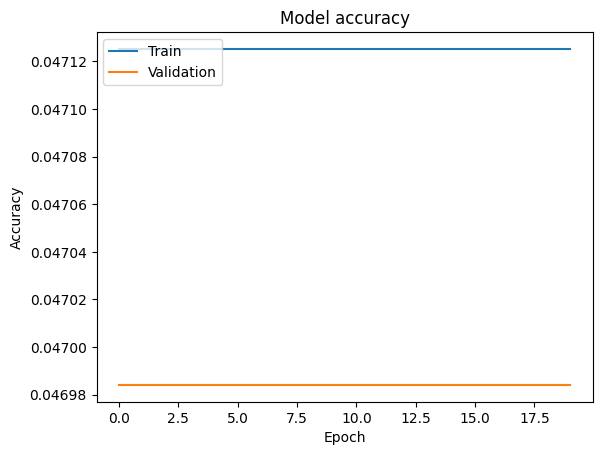

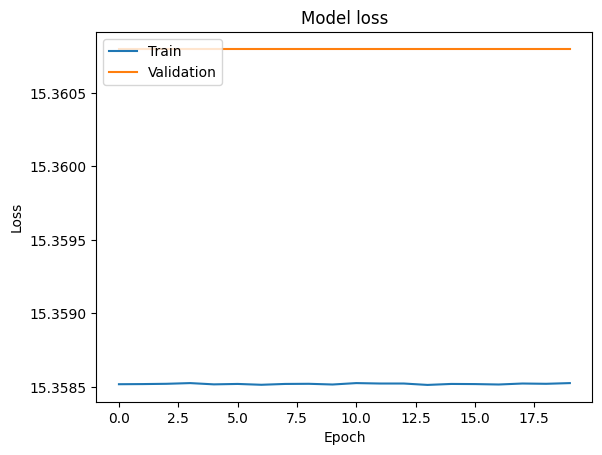

In [ ]:
# Plot training & validation accuracy values
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

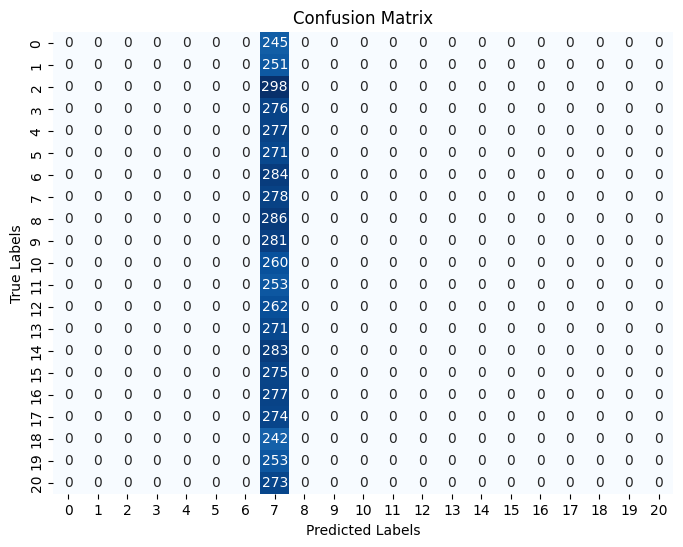

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_fault_train)
y_test_encoded = to_categorical(y_fault_test)
y_train_encoded.shape

(15750, 2)

In [ ]:
rnn_model = Sequential()

rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(timesteps, features),return_sequences=True))
# lstm_model.add(Dropout(0.2))

# lstm_model.add(LSTM(64, activation='relu',return_sequences=True))
# lstm_model.add(Dropout(0.2))

rnn_model.add(SimpleRNN(32, activation='relu'))

rnn_model.add(Dense(2, activation='sigmoid'))

rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, 1, 64)             14912     
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 32)                3104      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 18082 (70.63 KB)
Trainable params: 18082 (70.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adamax(learning_rate=0.001)
rnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
lstm_history = rnn_model.fit(X_train, y_train_encoded, epochs=20, batch_size=64, validation_split=0.1, shuffle = True)

Epoch 1/20
222/222 [==============================] - 3s 5ms/step - loss: 0.5666 - accuracy: 0.8114 - val_loss: 0.2646 - val_accuracy: 0.8540
Epoch 2/20
222/222 [==============================] - 1s 4ms/step - loss: 0.1606 - accuracy: 0.9646 - val_loss: 0.1219 - val_accuracy: 0.9892
Epoch 3/20
222/222 [==============================] - 1s 4ms/step - loss: 0.0979 - accuracy: 0.9939 - val_loss: 0.0771 - val_accuracy: 0.9968
Epoch 4/20
222/222 [==============================] - 1s 4ms/step - loss: 0.0758 - accuracy: 0.9958 - val_loss: 0.0626 - val_accuracy: 1.0000
Epoch 5/20
222/222 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9977 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 6/20
222/222 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9990 - val_loss: 0.0367 - val_accuracy: 0.9994
Epoch 7/20
222/222 [==============================] - 1s 6ms/step - loss: 0.0314 - accuracy: 0.9992 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 

In [ ]:
# Model evaluation
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test, y_test_encoded)
print('Test loss:', loss_rnn, 'Test accuracy:', accuracy_rnn)

178/178 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9873
Test loss: 0.08551282435655594 Test accuracy: 0.9873015880584717


In [ ]:
# Evaluate the model
y_pred_rnn = rnn_model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_rnn= np.argmax(y_pred_rnn, axis=1)
y_test = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
print("Accuracy:  %.5f" %accuracy_rnn)

# Calculate precision
precision_rnn = precision_score(y_test, y_pred_rnn, average='weighted')
print("Precision:  %.5f" % precision_rnn)

# Calculate recall
recall_rnn = recall_score(y_test, y_pred_rnn, average='weighted')
print("Recall:  %.5f" % recall_rnn)

# Calculate F1 score
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')
print("F1 Score:  %.5f" %f1_rnn)

# Generate classification report
report_rnn = classification_report(y_test, y_pred_rnn)
print("Classification Report:")
print(report_rnn)

# Calculate confusion matrix
conf_matrix_rnn = confusion_matrix(y_test, y_pred_rnn)

178/178 [==============================] - 1s 3ms/step
Accuracy:  0.98730
Precision:  0.98736
Recall:  0.98730
F1 Score:  0.98730
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2666
           1       0.98      0.99      0.99      3004

    accuracy                           0.99      5670
   macro avg       0.99      0.99      0.99      5670
weighted avg       0.99      0.99      0.99      5670



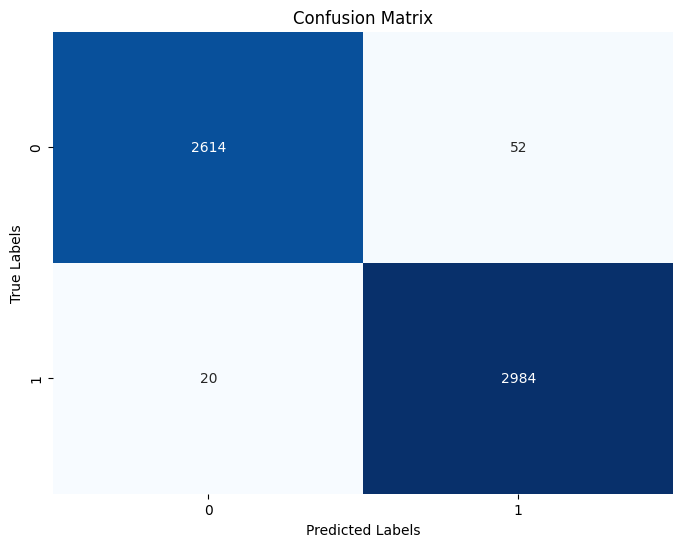

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()